In [97]:
import os
import pandas as pd
# import statsmodels.api as sm 
# import sklearn
import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',10)
pd.set_option('display.notebook_repr_html',True)
%matplotlib notebook

matplotlib.style.use('ggplot')

df = pd.read_csv(os.path.join('..',"data","consumer_complaints.csv.gz"))



//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [98]:
df

,date_received,product,sub_product,issue,sub_issue,...,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,...,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,...,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,...,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,...,08/30/2013,Closed with explanation,Yes,Yes,511067
...,...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,07/07/2014,Closed with explanation,Yes,No,919529
555953,07/01/2014,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,...,07/23/2014,Closed with explanation,No,No,918447
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,...,11/18/2013,Closed with explanation,Yes,No,114550
555955,04/14/2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,...,04/14/2015,Untimely response,No,No,1329963


In [99]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [100]:
products_df = df[ ['product', 'complaint_id'] ].groupby('product').count().rename(columns = {'complaint_id': 'count'}).reset_index()

### Mortgages are product complained about most

In [101]:
products_df = products_df.sort_values(by = 'count', ascending = False)

<IPython.core.display.Javascript object>


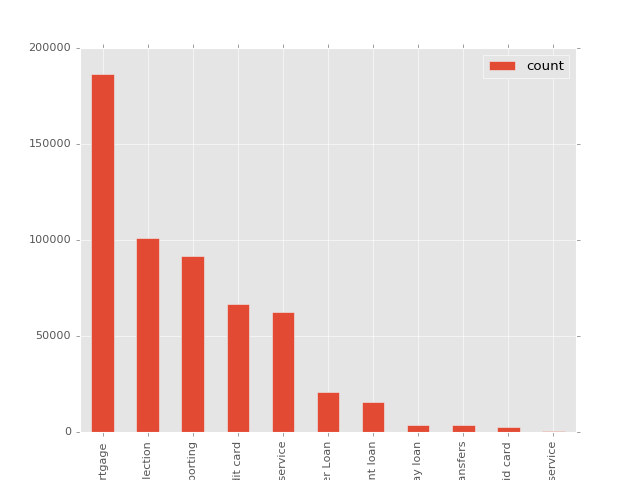

In [102]:
products_df.plot(x = 'product', y ='count', kind = 'bar')

In [103]:
df_mortgage_issues = df[df['product'] == 'Mortgage'][['issue','complaint_id']].groupby('issue').count().rename(columns = {'complaint_id': 'count'}).reset_index()

In [104]:
df_mortgage_issues = df_mortgage_issues.sort_values(by = 'count', ascending = False)

### The most common issues are foreclosure & mortgage broker complaints

<IPython.core.display.Javascript object>


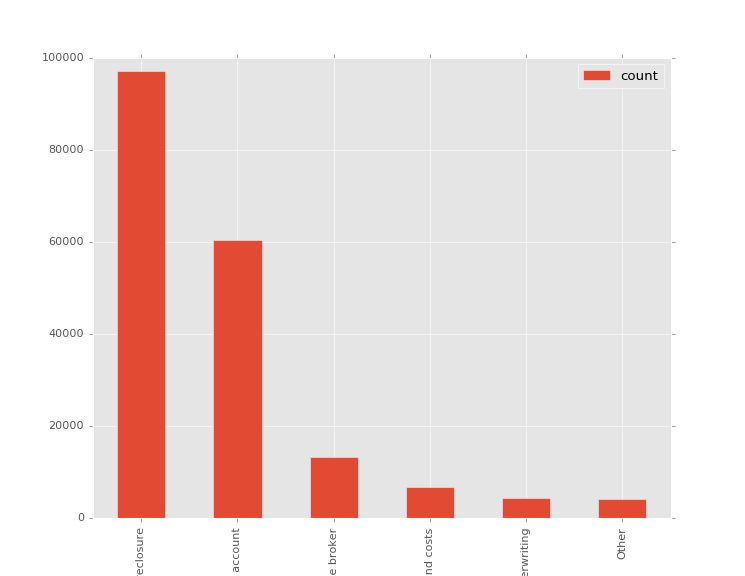

In [105]:
df_mortgage_issues.plot(x='issue', y= 'count', kind = 'bar')

In [95]:
df_product = pd.get_dummies(df['product'])

In [96]:
df_product.head()

,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,...,Mortgage,Other financial service,Payday loan,Prepaid card,Student loan
complaint_id,,,,,,,,,,,
511074,0,0,0,0,0,...,1,0,0,0,0
511080,0,0,0,0,0,...,1,0,0,0,0
510473,0,0,0,1,0,...,0,0,0,0,0
510326,0,0,0,0,0,...,0,0,0,0,1
511067,0,0,0,0,1,...,0,0,0,0,0


In [16]:
df_product = pd.get_dummies(df, columns=['product'])

In [107]:
df_with_expanded_product = pd.get_dummies(df, columns=['product'])

In [108]:
df_with_expanded_product.head()

,date_received,sub_product,issue,sub_issue,consumer_complaint_narrative,...,product_Mortgage,product_Other financial service,product_Payday loan,product_Prepaid card,product_Student loan
0,08/30/2013,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,...,1,0,0,0,0
1,08/30/2013,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,...,1,0,0,0,0
2,08/30/2013,NaN,Incorrect information on credit report,Account status,NaN,...,0,0,0,0,0
3,08/30/2013,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,...,0,0,0,0,1
4,08/30/2013,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,...,0,0,0,0,0


## Complaints by state

In [109]:
df_mortgage_counts_state = df_with_expanded_product.groupby('state').sum()

In [110]:
df_mortgage_counts_state

,complaint_id,product_Bank account or service,product_Consumer Loan,product_Credit card,product_Credit reporting,...,product_Mortgage,product_Other financial service,product_Payday loan,product_Prepaid card,product_Student loan
state,,,,,,,,,,,
AA,7534741,1.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,2.0
AE,214480925,21.0,15.0,24.0,47.0,...,68.0,0.0,0.0,1.0,10.0
AK,587575953,66.0,19.0,98.0,120.0,...,157.0,0.0,5.0,3.0,17.0
AL,5759014037,600.0,373.0,552.0,1096.0,...,1395.0,8.0,79.0,27.0,164.0
AP,160372554,7.0,9.0,20.0,28.0,...,39.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
VT,853127304,128.0,43.0,156.0,113.0,...,302.0,0.0,1.0,5.0,55.0
WA,11191050471,1094.0,275.0,1284.0,1829.0,...,4315.0,11.0,48.0,50.0,312.0
WI,5754954013,572.0,266.0,993.0,798.0,...,1955.0,7.0,75.0,45.0,209.0


In [111]:
# read in census data 

df_pop_state = pd.read_csv(os.path.join('..',"data","state_pop_abbreviations.csv"))


In [112]:
df_pop_state.head()



,State,State_,Pop
0,.Alabama,AL,"4,863,300"
1,.Alaska,AK,"741,894"
2,.Arizona,AZ,"6,931,071"
3,.Arkansas,AR,"2,988,248"
4,.California,CA,"39,250,017"


In [113]:
df_pop_state

,State,State_,Pop
0,.Alabama,AL,"4,863,300"
1,.Alaska,AK,"741,894"
2,.Arizona,AZ,"6,931,071"
3,.Arkansas,AR,"2,988,248"
4,.California,CA,"39,250,017"
...,...,...,...
46,.Virginia,VT,"8,411,808"
47,.Washington,WA,"7,288,000"
48,.West Virginia,WI,"1,831,102"
49,.Wisconsin,WV,"5,778,708"


In [114]:
df_mortgage_by_counts_state = df_with_expanded_product.groupby(['state']).sum()

In [115]:
df_mortgage_by_counts_state

,complaint_id,product_Bank account or service,product_Consumer Loan,product_Credit card,product_Credit reporting,...,product_Mortgage,product_Other financial service,product_Payday loan,product_Prepaid card,product_Student loan
state,,,,,,,,,,,
AA,7534741,1.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,2.0
AE,214480925,21.0,15.0,24.0,47.0,...,68.0,0.0,0.0,1.0,10.0
AK,587575953,66.0,19.0,98.0,120.0,...,157.0,0.0,5.0,3.0,17.0
AL,5759014037,600.0,373.0,552.0,1096.0,...,1395.0,8.0,79.0,27.0,164.0
AP,160372554,7.0,9.0,20.0,28.0,...,39.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
VT,853127304,128.0,43.0,156.0,113.0,...,302.0,0.0,1.0,5.0,55.0
WA,11191050471,1094.0,275.0,1284.0,1829.0,...,4315.0,11.0,48.0,50.0,312.0
WI,5754954013,572.0,266.0,993.0,798.0,...,1955.0,7.0,75.0,45.0,209.0


In [173]:
#create a series with summed number of complaints by state

df_mortgage_state_only = df_mortgage_by_counts_state['product_Mortgage']

In [192]:
type(df_mortgage_state_only)

pandas.core.series.Series

In [193]:
#turn series into dataframe 
df_mortgage_state_only.add_suffix('_complaints').reset_index()


,state,product_Mortgage
0,AA_complaints,4.0
1,AE_complaints,68.0
2,AK_complaints,157.0
3,AL_complaints,1395.0
4,AP_complaints,39.0
...,...,...
57,VT_complaints,302.0
58,WA_complaints,4315.0
59,WI_complaints,1955.0
60,WV_complaints,342.0


In [194]:
#still not a dataframe 
type(df_mortgage_state_only)

pandas.core.series.Series

In [199]:
df_mortgage_state_only.to_frame().reset_index()

,state,product_Mortgage
0,AA,4.0
1,AE,68.0
2,AK,157.0
3,AL,1395.0
4,AP,39.0
...,...,...
57,VT,302.0
58,WA,4315.0
59,WI,1955.0
60,WV,342.0


In [202]:
df_mortgage_state_only.to_frame()

,product_Mortgage
state,
AA,4.0
AE,68.0
AK,157.0
AL,1395.0
AP,39.0
...,...
VT,302.0
WA,4315.0
WI,1955.0


In [204]:
type(df_mortgage_state_only)


pandas.core.series.Series

In [205]:
df_mortgage_state_only.reset_index()

,state,product_Mortgage
0,AA,4.0
1,AE,68.0
2,AK,157.0
3,AL,1395.0
4,AP,39.0
...,...,...
57,VT,302.0
58,WA,4315.0
59,WI,1955.0
60,WV,342.0


In [150]:
#another attempt to turn this series into a Dataframe
df_mortgage_complaints_by_state = pd.Dataframe(series_mortgage_state_only, columns=['state', 'mortgage_complaints'])




AttributeError: module 'pandas' has no attribute 'Dataframe'

In [42]:
df_mortgage_by_counts_state = df_with_expanded_product.groupby(['state'], squeeze = True).sum()

In [29]:
df_mortgage_by_counts_state

,complaint_id,sum_of_complaints_by_product,product_Bank account or service,product_Consumer Loan,product_Credit card,...,product_Mortgage,product_Other financial service,product_Payday loan,product_Prepaid card,product_Student loan
state,,,,,,,,,,,
AA,7534741,7534750,1.0,0.0,2.0,...,4.0,0.0,0.0,0.0,2.0
AE,214480925,214481144,21.0,15.0,24.0,...,68.0,0.0,0.0,1.0,10.0
AK,587575953,587576591,66.0,19.0,98.0,...,157.0,0.0,5.0,3.0,17.0
AL,5759014037,5759019672,600.0,373.0,552.0,...,1395.0,8.0,79.0,27.0,164.0
AP,160372554,160372707,7.0,9.0,20.0,...,39.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
VT,853127304,853128247,128.0,43.0,156.0,...,302.0,0.0,1.0,5.0,55.0
WA,11191050471,11191062025,1094.0,275.0,1284.0,...,4315.0,11.0,48.0,50.0,312.0
WI,5754954013,5754960138,572.0,266.0,993.0,...,1955.0,7.0,75.0,45.0,209.0


<IPython.core.display.Javascript object>


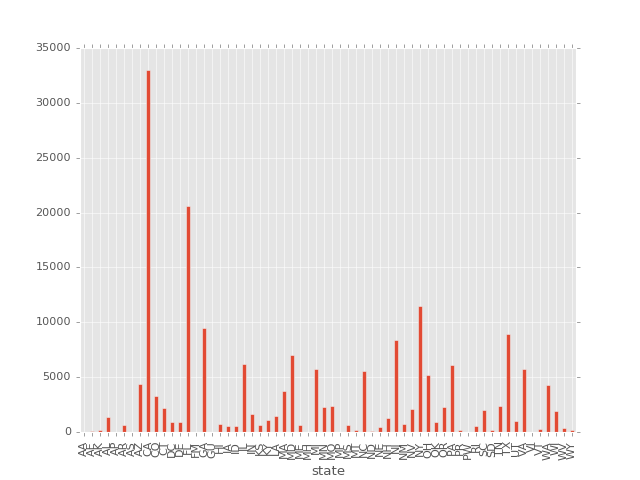

In [51]:
df_mortgage_by_counts_state['product_Mortgage'].plot(kind = "bar")

In [ ]:
type(df_mortgage_counts_by_state['product_Mortgage'])

In [ ]:
df_mortgage_counts_by_state['product_Mortgage'].to_frame()

In [ ]:
df_counts_by_state = df_with_expanded_product.groupby(['state']).count()

In [ ]:
df_counts_by_state

In [ ]:
df_mortgage_by_counts_state['product_Payday loan'].plot(kind = "bar")

In [17]:
df_mortgage_by_counts_state['product_Credit card'].plot(kind = "bar")

NameError: name 'df_mortgage_by_counts_state' is not defined

In [ ]:
df_mortgage_by_counts_state = df_with_expanded_product.groupby(['state'], squeeze = True).sum()

## Group by Product 

In [24]:
#this is creating a new column that is summing something unknown ???!!!
df_product['sum_of_complaints_by_product'] = df_product.sum(axis=1)

In [25]:
df_product

,date_received,sub_product,issue,sub_issue,consumer_complaint_narrative,...,product_Other financial service,product_Payday loan,product_Prepaid card,product_Student loan,sum_of_complaints_by_product
0,08/30/2013,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,...,0,0,0,0,511075
1,08/30/2013,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,...,0,0,0,0,511081
2,08/30/2013,NaN,Incorrect information on credit report,Account status,NaN,...,0,0,0,0,510474
3,08/30/2013,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,...,0,0,0,1,510327
4,08/30/2013,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,...,0,0,0,0,511068
...,...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,...,0,0,0,0,919530
555953,07/01/2014,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,...,0,0,0,0,918448
555954,07/10/2012,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,...,0,0,0,0,114551
555955,04/14/2015,I do not know,Communication tactics,Frequent or repeated calls,NaN,...,0,0,0,0,1329964


In [191]:
df_with_expanded_product.columns

Index(['date_received', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id',
       'product_Bank account or service', 'product_Consumer Loan',
       'product_Credit card', 'product_Credit reporting',
       'product_Debt collection', 'product_Money transfers',
       'product_Mortgage', 'product_Other financial service',
       'product_Payday loan', 'product_Prepaid card', 'product_Student loan'],
      dtype='object')

In [207]:

df_with_expanded_product.consumer_complaint_narrative()

,date_received,sub_product,issue,sub_issue,consumer_complaint_narrative,...,product_Mortgage,product_Other financial service,product_Payday loan,product_Prepaid card,product_Student loan
0,08/30/2013,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,...,1,0,0,0,0
1,08/30/2013,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,...,1,0,0,0,0
2,08/30/2013,NaN,Incorrect information on credit report,Account status,NaN,...,0,0,0,0,0
3,08/30/2013,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,...,0,0,0,0,1
4,08/30/2013,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,...,0,0,0,0,0


In [210]:
consumer_complaint_narrative = df_with_expanded_product[ ['issue', 'consumer_complaint_narrative'] ].groupby('product_Mortgage').count().rename(columns = {'complaint_id': 'count'}).reset_index()

KeyError: 'product_Mortgage'